# Laboratorio 4
Alina Carías, Daniel Machic y Ariela Mishaan

https://github.com/ArielaMishaanCohen/LAB4.git 

## Librerias

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

## Task 1

### Ejercicio 1

##### Homografía H: matriz 3 x 3. Explicar matemáticamente por qué, aunque tiene 9 elementos, solo posee 8 grados de libertad (GDL).

Una homografía se define como: 

$$
x' \sim Hx
$$

$$ H = 
\begin{bmatrix}
h_{11} & h_{12} & h_{13} \\
h_{21} & h_{22} & h_{23} \\
h_{31} & h_{32} & h_{33}
\end{bmatrix}
$$

En geometría proyectiva: $\mathbf{x} \sim \lambda \mathbf{x}$. Los vectores homogéneos son equivalentes hasta un factor de escala no nulo. Entonces: 

$$\mathbf{x'} \sim \mathbf{Hx}$$
$$\mathbf{x'} \sim \alpha \mathbf{Hx}$$

Si multiplicamos toda la matriz por un escalar:

$$\mathbf{H'} = \alpha \mathbf{H}$$

la transformación no cambia. Por lo tanto: 

$$\mathbf{H} \sim \alpha \mathbf{H}$$

Esto implica que las matrices que difieren por un factor escalar representan la misma homografía. 

**Conteo de grados de libertad**

La matriz tiene 9 parámetros: $(h_{11}, h_{12}, ..., h_{33})$

Pero debido a la ambigüedad de la escala, uno de ellos es redundante. Formalmente:

$$\mathbf{H} \in P^8$$

porque estamos en el espacio proyectivo. Entonces: 

$$GDL = 9 - 1 = 8$$

**Forma alternativa de verlo**

Se puede fijar arbitrariamente uno de los parámetros, por ejemplo: $h_{33} = 1$. Esto elimina el grado de libertad asociado a la escala. 

--> Aunque H tiene 9 elementos, solo tiene 8 grados de libertad porque está definida hasta un factor escalar no nulo. 

##### Si tuviéramos una cámara que solo rota sobre su eje óptico (sin traslación ni cambio de perspectiva), ¿la matriz de transformación sigue teniendo 8 GDL o se reduce? Demostrar la estructura de dicha matriz simplificada.

La rotación alrededor del eje Z es: 

$$ \mathbf{R_z} = 
\begin{bmatrix}
cos \theta & - sin \theta & 0 \\
sin \theta & cos \theta & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

**NOTA**: se preguntó en búsqueda de Google: "matriz de rotación para cámara que gira sobre propio eje z y se obtuvo el resultado que se ve arriba. 

**Homografía inducida por rotación**

Para la rotación: $\mathbf{H} = \mathbf{KRK}^{-1}$. Si se asume que la cámara está calibrada y sistema normalizado: $\mathbf{K} = I$. Entonces: $\mathbf{H} = \mathbf{R_z}$

**Grados de libertad**
La matriz queda: 

$$ \mathbf{H} = 
\begin{bmatrix}
cos \theta & - sin \theta & 0 \\
sin \theta & cos \theta & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

Aquí solo existe la variable $\theta$. Por lo tanto: 

$$GDL = 1$$

**Conclusión:** Si la cámara solo rota sobre su eje óptico, la homografía ya no tiene 8 GDL. Se reduce a 1 GDL (el ángulo $\theta$). La estructura se convierte a una rotación 2D. 

### Ejercicio 2

##### DLT: se convierte el problema $x' = Hx$ en un sistema de la forma $Ah = 0$. Explicar por qué buscamos el vector singular asociado al menor valor singular de A en lugar de simplemente invertir la matriz. 

Primero, el sistema es homogéneo. En DLT se resuelve: $Ah = 0$. Como no es un sistema de tipo $Ah = b$, si se intenta invertir, se obtendría la solución trivial $h = 0$, que no sirve porque no define una homografía. 

Segundo, la matriz A no es cuadrada. Normalmente $A \in \mathbb{R}^{2n \times 9}$. Si usamos más de 4 puntos, hay más ecuaciones que incógnitas, entonces A no se puede invertir. 

Por último, en la práctica, debido al ruido en la detección de puntos, $Ah = 0$ no tiene solución exacta. Entonces buscamos el valor h que minimiza el error $||Ah||$. La SVD da el vector singular asociado al menor valor singular, que es el que hace que $Ah$ sea lo más cercano posible a cero.

##### ¿Qué representa geométricamente ese "menor valor singular" cuando los datos tienen ruido?

Cuando los datos son perfectos, el menor valor singular sería exactamente 0. Eso significa que existe una homografía que satisface todas las ecuaciones exactamente. Pero cuando hay ruido, el sistema ya no es perfectamente consistente. El menor valor singular ya no es 0, sino un número pequeño. Geométricamente, ese menor valor singular representa el **error residual mínimo** del sistema, es decir, qué tan lejos están los datos reales de cumplir perfectamente una transformación proyectiva. Mientras más pequeño sea ese valor, más cerca están losp untos de cumplir exactamente una homografía y mejor es el ajuste. 

### Ejercicio 3

##### Si se seleccionan 4 puntos para caluclar H, pero 3 de ellos son colineales (están en la misma línea recta), el algoritmo fallará. Explicar algebraicamente qué le sucede a la matriz A del sistema DLT en este caso y por qué no tiene solución única.

En DLT se construye el sistema $Ah = 0$, donde $h$ tiene 9 incógnitas y cada correspondencia aporta 2 ecuaciones. Con 4 puntos, obtenemos una matriz $A$ de tamaño 8 x 9. 

**Si 3 puntos son colineales**, no aportan información suficiente sobre la transformación proyectiva en 2D. Una homografía necesita que los puntos estén distribuidos en el plano, no todos alineados. 

Algebraicamente, cuando los puntos son colineales
- algunas ecuaciones de A se vuelven linealmente dependientes
- las filas dejan de aportar información independiente
- el rango de $A$ disminuye. 

Para obtener una solución única (hasta escala), se necesita: 
$$rango(A) = 8$$

Pero si hay colinealidad: 

$$rango(A) < 8$$

Si el rango disminuye, el espacio nulo de A ya no tiene dimensión 1. Hay múltiples soluciones posibles para $h$, no existe homografía única. 

## Task 2

### Carga de imagenes

In [ ]:
img_arriba = cv2.imread('Foto_derecha.jpeg')
img_lado = cv2.imread('Foto_centro.jpeg')
img_frente = cv2.imread('Foto_izquierda.jpeg')

gray_arriba = cv2.cvtColor(img_arriba, cv2.COLOR_BGR2GRAY)
gray_lado = cv2.cvtColor(img_lado, cv2.COLOR_BGR2GRAY)
gray_frente = cv2.cvtColor(img_frente, cv2.COLOR_BGR2GRAY)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(gray_arriba, cmap='gray')
axes[0].set_title('Foto Arriba')
axes[0].axis('off')

axes[1].imshow(gray_lado, cmap='gray')
axes[1].set_title('Foto del Lado')
axes[1].axis('off')

axes[2].imshow(gray_frente, cmap='gray')
axes[2].set_title('Foto Frente')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print(f"Tamaños: Arriba={gray_arriba.shape}, Lado={gray_lado.shape}, Frente={gray_frente.shape}")

### 1. Detección y Macheo

#### a) Utilizar SIGT u ORB

In [ ]:
sift = cv2.SIFT_create()

# Detectar keypoints y descriptores en cada imagen
kp_arriba, des_arriba = sift.detectAndCompute(gray_arriba, None)
kp_lado, des_lado = sift.detectAndCompute(gray_lado, None)
kp_frente, des_frente = sift.detectAndCompute(gray_frente, None)

print(f"Keypoints detectados:")
print(f"  Foto Arriba: {len(kp_arriba)} puntos")
print(f"  Foto Lado: {len(kp_lado)} puntos")
print(f"  Foto Frente: {len(kp_frente)} puntos")

Keypoints detectados:
  Foto Arriba: 1526 puntos
  Foto Lado: 1973 puntos
  Foto Frente: 1194 puntos


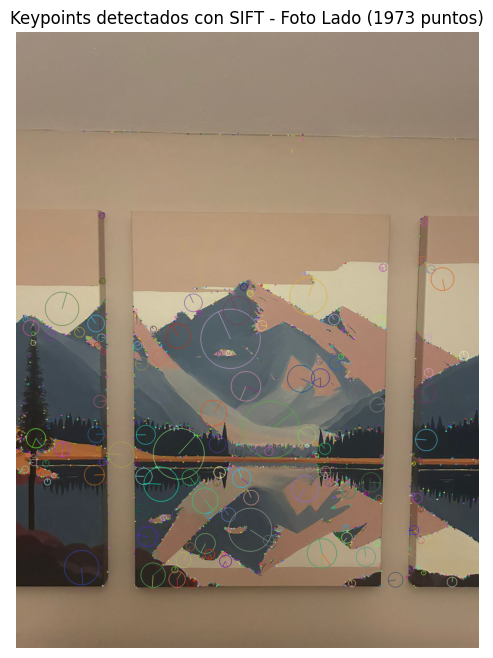

In [ ]:
img_kp = cv2.drawKeypoints(img_lado, kp_lado, None, 
                            flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(img_kp, cv2.COLOR_BGR2RGB))
plt.title(f'Keypoints detectados con SIFT - Foto Lado ({len(kp_lado)} puntos)')
plt.axis('off')
plt.show()

#### b) Brute-Force Matcher

In [ ]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)

matches_arriba_lado = bf.knnMatch(des_arriba, des_lado, k=2)
matches_lado_frente = bf.knnMatch(des_lado, des_frente, k=2)

print(f"\nMatches en crudo (antes de filtrar):")
print(f"  Arriba -> Lado: {len(matches_arriba_lado)} matches")
print(f"  Lado -> Frente: {len(matches_lado_frente)} matches")


Matches en crudo (antes de filtrar):
  Arriba -> Lado: 1526 matches
  Lado -> Frente: 1973 matches


#### c) Visualizar matches

##### Sin filtrar

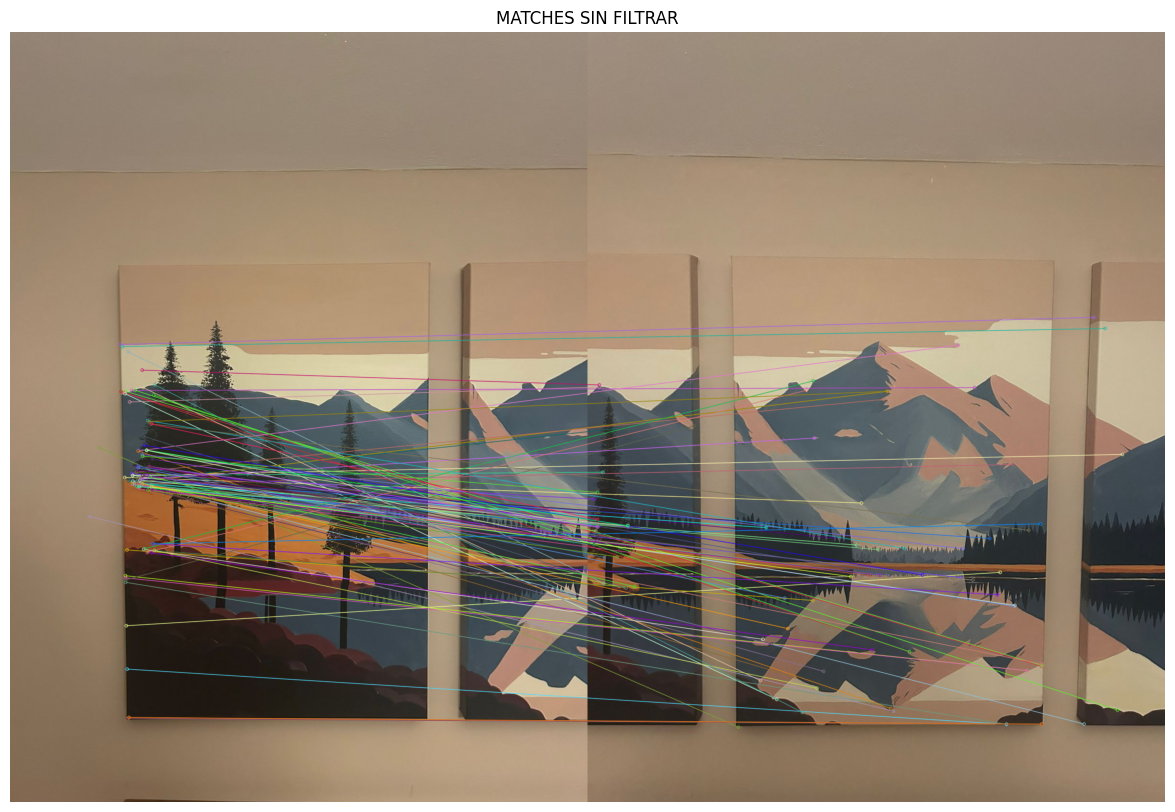

In [ ]:
matches_visualizar = []
for m_n in matches_arriba_lado:
    if len(m_n) == 2:
        matches_visualizar.append(m_n[0])  

matches_muestra = matches_visualizar[:100]

# Matches sin filtrar
img_matches_raw = cv2.drawMatches(img_arriba, kp_arriba, 
                                img_lado, kp_lado, 
                                matches_muestra, None,
                                flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(img_matches_raw, cv2.COLOR_BGR2RGB))
plt.title(f'MATCHES SIN FILTRAR')
plt.axis('off')
plt.show()

##### Filtrando

In [ ]:
def filtrar_lowe_ratio(matches_knn, ratio=0.75):
    buenos_matches = []
    for par in matches_knn:
        if len(par) == 2:
            mejor, segundo_mejor = par
            if mejor.distance < ratio * segundo_mejor.distance:
                buenos_matches.append(mejor)
    return buenos_matches

buenos_al = filtrar_lowe_ratio(matches_arriba_lado, ratio=0.75)
buenos_lf = filtrar_lowe_ratio(matches_lado_frente, ratio=0.75)

print(f"\nMatches después de Lowe's Ratio Test:")
print(f"  Arriba -> Lado: {len(buenos_al)} ({100*len(buenos_al)/len(matches_arriba_lado):.1f}%)")
print(f"  Lado -> Frente: {len(buenos_lf)} ({100*len(buenos_lf)/len(matches_lado_frente):.1f}%)")


Matches después de Lowe's Ratio Test:
  Arriba -> Lado: 248 (16.3%)
  Lado -> Frente: 325 (16.5%)


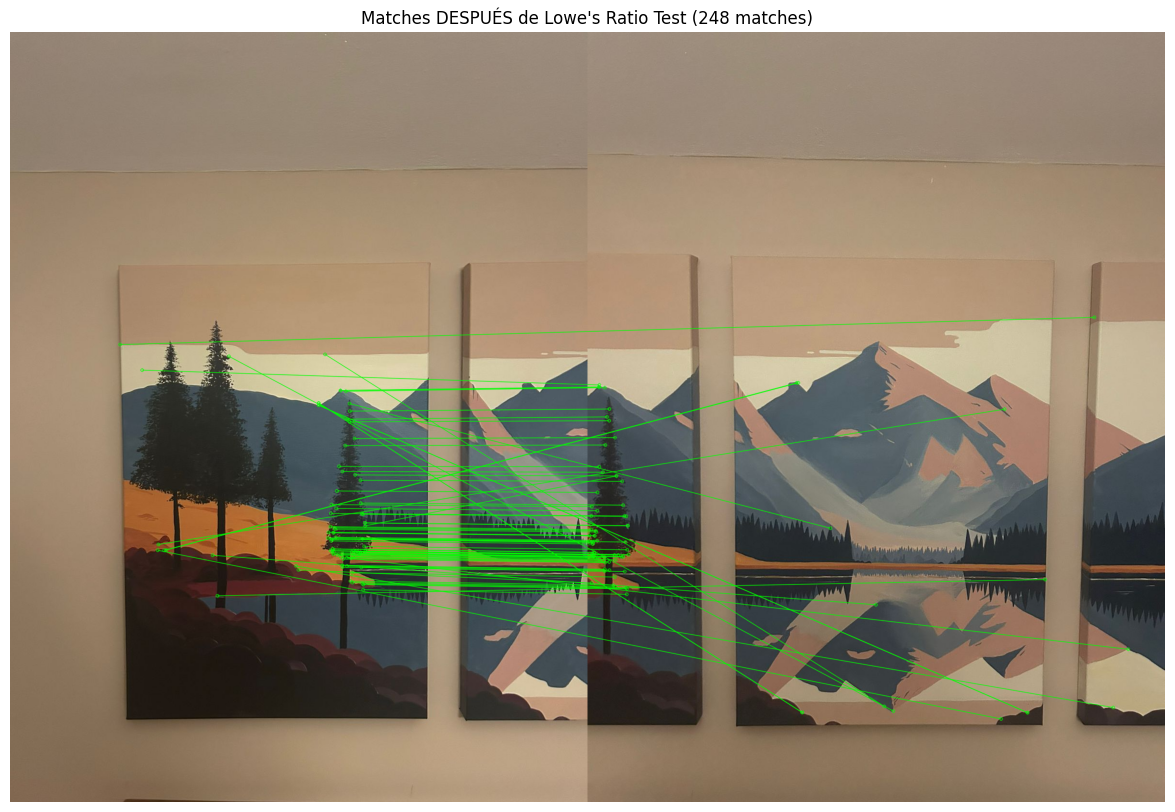

In [ ]:
img_filtrado = cv2.drawMatches(img_arriba, kp_arriba, 
                                img_lado, kp_lado, 
                                buenos_al[:80], None,
                                matchColor=(0, 255, 0),
                                flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(img_filtrado, cv2.COLOR_BGR2RGB))
plt.title(f'Matches DESPUÉS de Lowe\'s Ratio Test ({len(buenos_al)} matches)')
plt.axis('off')
plt.show()

### 2. Algoritmo DLT

In [ ]:
def calcular_homografia_dlt(puntos_src, puntos_dst):
    # 2.d - NORMALIZACIÓN 
    media_src = np.mean(puntos_src, axis=0)
    desv_src = np.std(puntos_src)
    T_src = np.array([[1/desv_src, 0, -media_src[0]/desv_src],
                    [0, 1/desv_src, -media_src[1]/desv_src],
                    [0, 0, 1]])
    
    puntos_src_norm = (puntos_src - media_src) / desv_src
    
    media_dst = np.mean(puntos_dst, axis=0)
    desv_dst = np.std(puntos_dst)
    T_dst = np.array([[1/desv_dst, 0, -media_dst[0]/desv_dst],
                    [0, 1/desv_dst, -media_dst[1]/desv_dst],
                    [0, 0, 1]])
    
    puntos_dst_norm = (puntos_dst - media_dst) / desv_dst
    
    # 2.b - CONSTRUIR MATRIZ A de tamaño 8x9
    A = []
    for i in range(4):
        x, y = puntos_src_norm[i]
        xp, yp = puntos_dst_norm[i]
        A.append([-x, -y, -1, 0, 0, 0, x*xp, y*xp, xp])
        A.append([0, 0, 0, -x, -y, -1, x*yp, y*yp, yp])
    
    A = np.array(A)
    
    # 2.c - RESOLVER usando SVD 
    U, S, Vt = np.linalg.svd(A)
    H_normalizada = Vt[-1].reshape(3, 3)
    
    # 2.d - DES-NORMALIZAR la matriz H
    H = np.linalg.inv(T_dst) @ H_normalizada @ T_src
    H = H / H[2, 2]
    
    return H

In [ ]:
pts_src_test = np.float32([kp_arriba[buenos_al[i].queryIdx].pt for i in range(4)])
pts_dst_test = np.float32([kp_lado[buenos_al[i].trainIdx].pt for i in range(4)])

H_test = calcular_homografia_dlt(pts_src_test, pts_dst_test)

print("Función DLT implementada correctamente")
print(f"Matriz H de prueba (con 4 puntos aleatorios):")
print(H_test)

Función DLT implementada correctamente
Matriz H de prueba (con 4 puntos aleatorios):
[[-4.55990626e+00  3.86126447e-01  9.78584730e+02]
 [-3.02200652e+00  2.92702314e-01  6.05875263e+02]
 [-4.96394427e-03  4.80786267e-04  1.00000000e+00]]


### 3. RANSAC Manual

#### Función ransac homografia

In [ ]:
def ransac_homografia(matches, kp_src, kp_dst, umbral=3.0, prob_exito=0.99):

    # Extraer coordenadas de los matches
    puntos_src = np.float32([kp_src[m.queryIdx].pt for m in matches])
    puntos_dst = np.float32([kp_dst[m.trainIdx].pt for m in matches])
    
    # 3.b - CALCULAR N DINÁMICAMENTE 
    w = 0.5  
    p = prob_exito
    N = int(np.log(1 - p) / np.log(1 - w**4))
    print(f"Iteraciones RANSAC calculadas: N = {N}")
    
    mejor_H = None
    max_inliers = 0
    mejor_mask = None
    
    for iteracion in range(N):
        # 3.c.i - SELECCIONAR 4 MATCHES ALEATORIOS
        indices_random = np.random.choice(len(matches), 4, replace=False)
        muestra_src = puntos_src[indices_random]
        muestra_dst = puntos_dst[indices_random]
        
        # 3.c.ii - LLAMAR A FUNCIÓN DLT
        H_candidata = calcular_homografia_dlt(muestra_src, muestra_dst)
        
        # 3.c.iii - PROYECTAR TODOS LOS PUNTOS 
        puntos_src_hom = np.column_stack([puntos_src, np.ones(len(puntos_src))])
        proyectados = (H_candidata @ puntos_src_hom.T).T
        proyectados = proyectados[:, :2] / proyectados[:, 2:3]
        
        # 3.c.iv - CALCULAR ERROR DE REPROYECCIÓN y CONTAR INLIERS
        errores = np.linalg.norm(puntos_dst - proyectados, axis=1)
        mask = errores < umbral
        num_inliers = np.sum(mask)
        
        if num_inliers > max_inliers:
            max_inliers = num_inliers
            mejor_H = H_candidata
            mejor_mask = mask
            w = num_inliers / len(matches)
            if w > 0 and w < 1:
                N_nuevo = int(np.log(1 - p) / np.log(1 - w**4))
                N = min(N, N_nuevo)
    
    porcentaje = 100 * max_inliers / len(matches)
    print(f"Inliers encontrados: {max_inliers}/{len(matches)} ({porcentaje:.1f}%)")
    
    # 3.d - REFINAMIENTO
    inliers_src = puntos_src[mejor_mask]
    inliers_dst = puntos_dst[mejor_mask]
    A_refinado = []

    for i in range(len(inliers_src)):
        x, y = inliers_src[i]
        xp, yp = inliers_dst[i]
        A_refinado.append([-x, -y, -1, 0, 0, 0, x*xp, y*xp, xp])
        A_refinado.append([0, 0, 0, -x, -y, -1, x*yp, y*yp, yp])
    
    A_refinado = np.array(A_refinado)
    _, _, Vt = np.linalg.svd(A_refinado)
    H_final = Vt[-1].reshape(3, 3)
    H_final = H_final / H_final[2, 2]
    
    return H_final, mejor_mask

print("Función RANSAC implementada")

Función RANSAC implementada


#### Matches filtrados

In [ ]:
print("="*60)
print("RANSAC: Foto Arriba -> Foto Lado")
print("="*60)
H_arriba_lado, inliers_al = ransac_homografia(buenos_al, kp_arriba, kp_lado, 
                                                umbral=3.0, prob_exito=0.99)

RANSAC: Foto Arriba -> Foto Lado
Iteraciones RANSAC calculadas: N = 71
Inliers encontrados: 175/248 (70.6%)


In [ ]:
print("\n" + "="*60)
print("RANSAC: Foto Lado -> Foto Frente")
print("="*60)
H_lado_frente, inliers_lf = ransac_homografia(buenos_lf, kp_lado, kp_frente, 
                                                umbral=3.0, prob_exito=0.99)


RANSAC: Foto Lado -> Foto Frente
Iteraciones RANSAC calculadas: N = 71
Inliers encontrados: 179/325 (55.1%)


In [ ]:
print("\n" + "="*60)
print("HOMOGRAFÍAS FINALES CALCULADAS")
print("="*60)
print("\nH (Arriba -> Lado):")
print(H_arriba_lado)
print("\nH (Lado -> Frente):")
print(H_lado_frente)


HOMOGRAFÍAS FINALES CALCULADAS

H (Arriba -> Lado):
[[ 1.10701687e+00  2.12157672e-02 -7.50568623e+02]
 [ 4.70622726e-02  1.10438949e+00 -8.44366617e+01]
 [ 4.55363497e-05  1.63863920e-05  1.00000000e+00]]

H (Lado -> Frente):
[[ 1.04122761e+00  4.03471112e-02 -6.37222662e+02]
 [ 1.40112503e-02  1.05473288e+00 -6.98305169e+01]
 [ 8.63053293e-06  3.20438108e-05  1.00000000e+00]]



Verificando homografías...
H_arriba_lado tipo: <class 'numpy.ndarray'>, shape: (3, 3)
H_lado_frente tipo: <class 'numpy.ndarray'>, shape: (3, 3)

Creando panorama stitched...
Canvas del panorama: 2552x1767 pixels


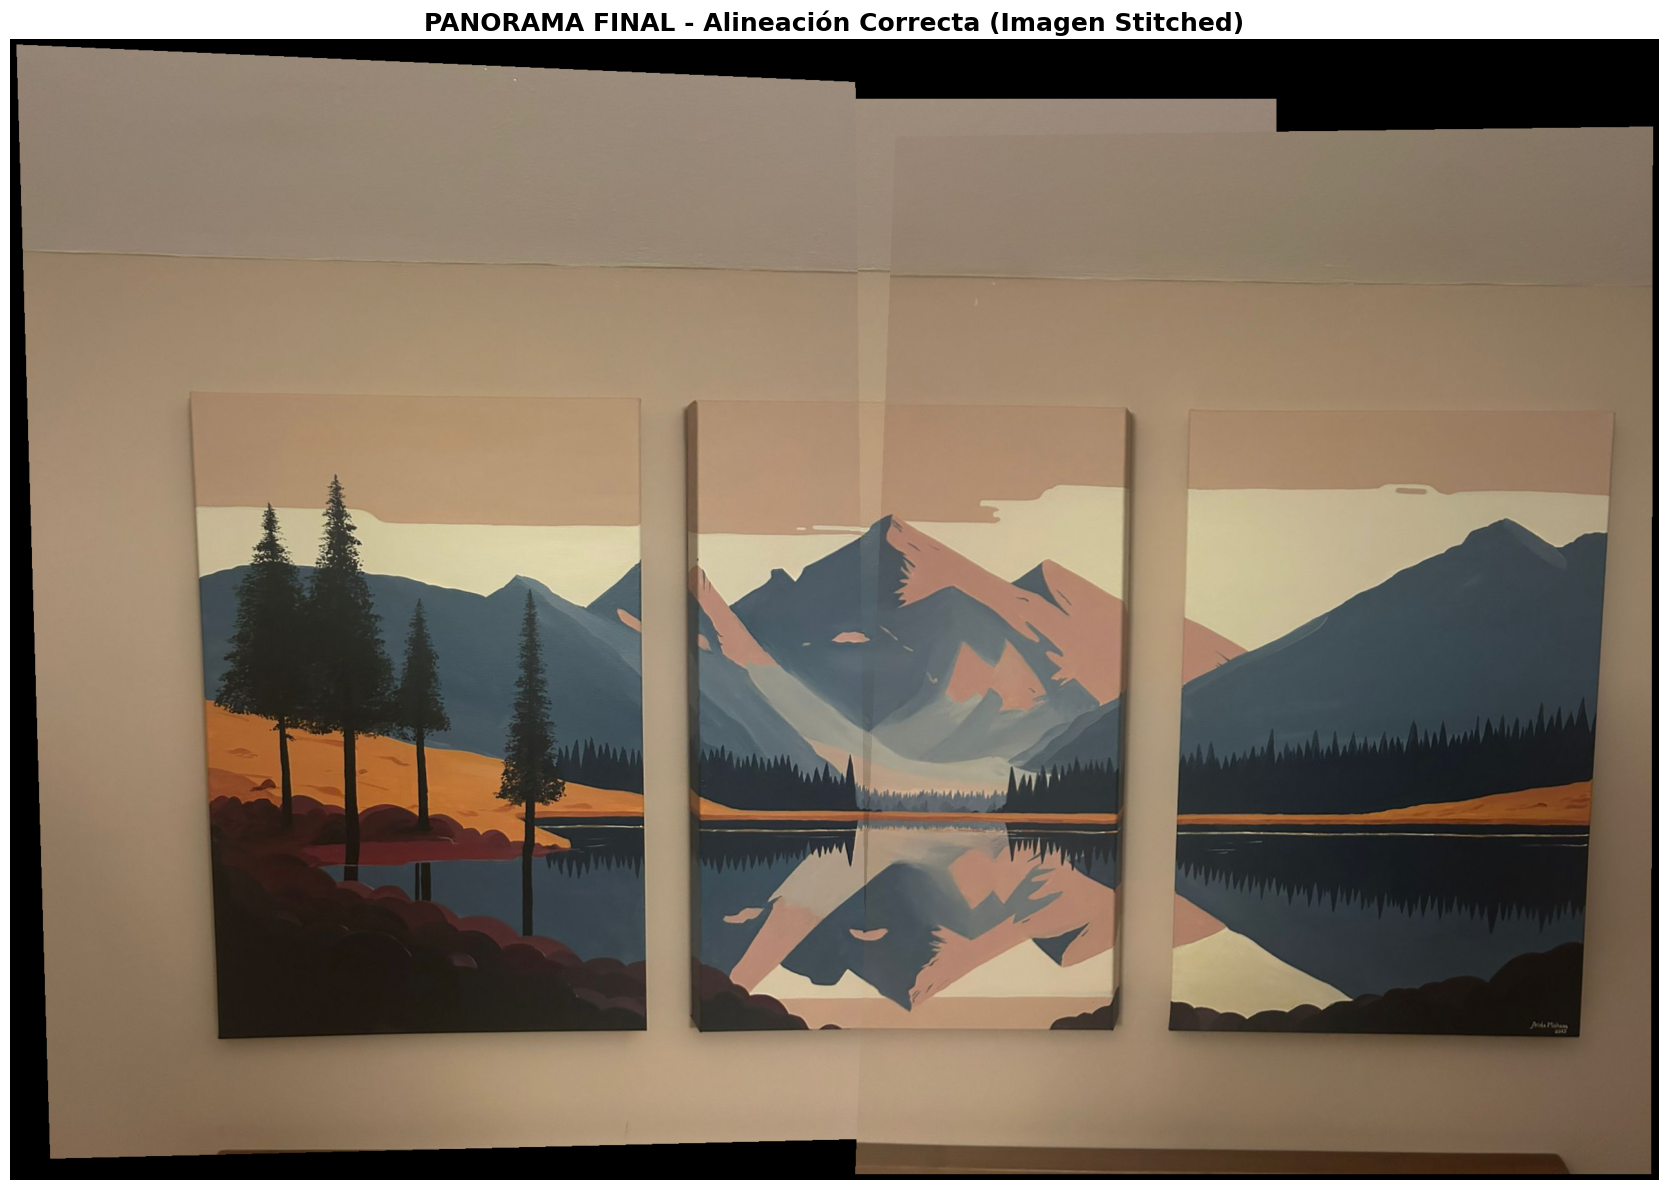


Dimensiones del panorama: 2552x1767 pixels


In [ ]:
def crear_panorama(img1, img2, img3, H_12, H_23):
    if H_12 is None or H_23 is None:
        print("ERROR: Una o ambas homografías son None")
        return None
    
    H_12 = np.array(H_12, dtype=np.float64)
    H_23 = np.array(H_23, dtype=np.float64)
    
    if H_12.shape != (3, 3) or H_23.shape != (3, 3):
        print(f"ERROR: Homografías con forma incorrecta: H_12={H_12.shape}, H_23={H_23.shape}")
        return None
    
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]
    h3, w3 = img3.shape[:2]
    
    # Esquinas de cada imagen
    corners_1 = np.float32([[0, 0], [w1, 0], [w1, h1], [0, h1]]).reshape(-1, 1, 2)
    corners_2 = np.float32([[0, 0], [w2, 0], [w2, h2], [0, h2]]).reshape(-1, 1, 2)
    corners_3 = np.float32([[0, 0], [w3, 0], [w3, h3], [0, h3]]).reshape(-1, 1, 2)
    corners_1_trans = cv2.perspectiveTransform(corners_1, H_12)
    corners_3_trans = cv2.perspectiveTransform(corners_3, np.linalg.inv(H_23))
    todas_corners = np.concatenate([corners_1_trans, corners_2, corners_3_trans])
    
    [x_min, y_min] = np.int32(todas_corners.min(axis=0).ravel() - 10)
    [x_max, y_max] = np.int32(todas_corners.max(axis=0).ravel() + 10)
    
    T = np.array([[1, 0, -x_min],
                [0, 1, -y_min],
                [0, 0, 1]], dtype=np.float64)
    
    ancho = x_max - x_min
    alto = y_max - y_min
    
    print(f"Canvas del panorama: {ancho}x{alto} pixels")
    
    # Crear panorama transformando cada para imagen
    panorama = cv2.warpPerspective(img2, T, (ancho, alto))
    
    # img1 (transformada con H_12)
    H_12_final = T @ H_12
    panorama = cv2.warpPerspective(img1, H_12_final, (ancho, alto),
                                    dst=panorama, 
                                    borderMode=cv2.BORDER_TRANSPARENT)
    
    # img3 (transformada con inversa de H_23)
    H_23_inv = np.linalg.inv(H_23)
    H_23_final = T @ H_23_inv
    panorama = cv2.warpPerspective(img3, H_23_final, (ancho, alto),
                                    dst=panorama, 
                                    borderMode=cv2.BORDER_TRANSPARENT)
    
    return panorama

print(f"H_arriba_lado tipo: {type(H_arriba_lado)}, shape: {H_arriba_lado.shape if hasattr(H_arriba_lado, 'shape') else 'N/A'}")
print(f"H_lado_frente tipo: {type(H_lado_frente)}, shape: {H_lado_frente.shape if hasattr(H_lado_frente, 'shape') else 'N/A'}")

# Crear panorama final
panorama = crear_panorama(img_arriba, img_lado, img_frente, 
                        H_arriba_lado, H_lado_frente)

if panorama is not None:
    plt.figure(figsize=(24, 12))
    plt.imshow(cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB))
    plt.title('PANORAMA FINAL ', fontsize=18, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    print(f"\nDimensiones del panorama: {panorama.shape[1]}x{panorama.shape[0]} pixels")
else:
    print("\nERROR: No se pudo crear el panorama.")

### Pregunta a inteligencia artificial

Habiamos hecho el trabajo pero los resultados daban eran extraños, por lo que le preguntamos que es lo que estaba mal. Le mandamos el ipynb donde estabamos trabajando y colocamos este prompt **Me salieron asi los resultados de mi ejercicio, pero yo creo que la ultima esta malo. Ayudame si esta malo y si no explicame porque esta bien**
Este prompt funcionó porque vio las fotos y nos dijo que estaban mal tomadas y que si no queriamos cambiarlas nos ayudaba con el código para que se arreglara. Nosotras tomamos la opción de volver a tomar la foto y le pedimos ayuda para que nos dijera bien como hacerlo. 